In Scikit-Learn’s SVM: control this balance using the C hyperparame
ter: a smaller C value leads to a wider street but more margin violations.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 10, loss = "hinge")),
])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it is much slower, especially with large training sets

Another option is to use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C)).It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory

In [2]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

pol_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()), 
    ("svm_clf", LinearSVC(C = 10, loss = "hinge", random_state = 42))
])
pol_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

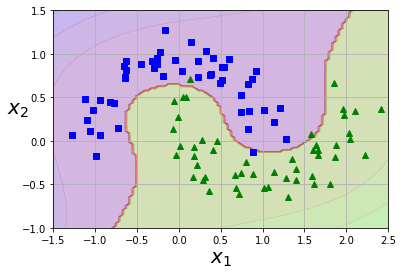

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(pol_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

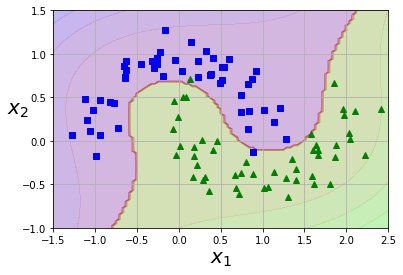

In [4]:
from sklearn.svm import SVC
poly_ker_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
])
poly_ker_svm_clf.fit(X,y)
plot_predictions(poly_ker_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

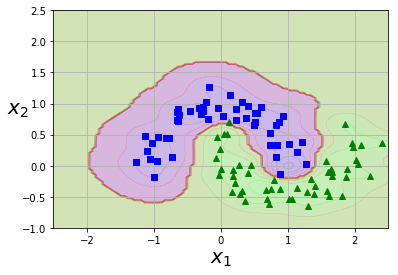

In [7]:
rbf_ker_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma=5, C=5))
])
rbf_ker_svm_clf.fit(X, y)
plot_predictions(rbf_ker_svm_clf, [-2.5, 2.5, -1, 2.5])
plot_dataset(X, y, [-2.5, 2.5, -1, 2.5])
plt.show()

# Regression
SVM回归则是尽量让点在margin以内通过参数ε控制margin的大小，ε越大，margin越大，否则越小。
ε即epsilon

In [8]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [9]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state = 42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [10]:
from sklearn.svm import SVR
svm_reg_2 = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_reg_2.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Linear:
 K(a, b) = aT · b
Polynomial:
 K(a, b) = (γaT · b + r)d
Gaussian RBF:
 K(a, b) = exp(−γ∥ a − b ∥2)
Sigmoid:
 K(a, b) = tanh(γaT · b + r)
